In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
from statsmodels.tsa.stattools import adfuller, acf, pacf
from scipy.stats import boxcox
from statsmodels.stats.diagnostic import acorr_ljungbox



In [71]:
df = pd.read_csv("Tractor-Sales.csv")


In [72]:
df.info()
len(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Month-Year              144 non-null    object
 1   Number of Tractor Sold  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


144

In [73]:
dates = pd.date_range(start = "2003-01-01", freq="MS", periods= len(df))
dates

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [74]:
#Breakink down into INDIVIDUAL COMPONENTS (Year, Months, and Date)
import calendar
df["Months"] = dates.month
df["Months"] = df["Months"].apply(lambda x: calendar.month_abbr[x]) #Because of this line we will get(Jan, Feb) instead of (1st, 2nd) month

df["Year"] = dates.year

In [75]:
df.drop(["Month-Year"], axis=1, inplace= True)


In [68]:
df.head()


,Number of Tractor Sold,Months,Year
2003-01-01,141,Jan,2003
2003-04-01,157,Feb,2003
2003-07-01,185,Mar,2003
2003-10-01,199,Apr,2003
2004-01-01,203,May,2003


In [78]:
#Indexing
df.set_index(dates, inplace=True)
df.head()

,Number of Tractor Sold,Months,Year
2003-01-01,141,Jan,2003
2003-02-01,157,Feb,2003
2003-03-01,185,Mar,2003
2003-04-01,199,Apr,2003
2003-05-01,203,May,2003


Text(0, 0.5, 'Tractor Sales')

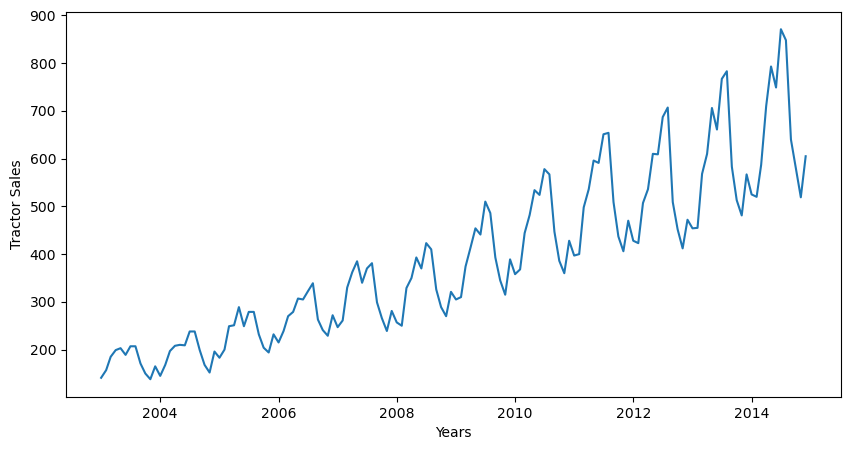

In [79]:
#PLOT
df_ts= df["Number of Tractor Sold"]
plt.figure(figsize=(10,5))
plt.plot(df_ts)
plt.xlabel("Years")
plt.ylabel("Tractor Sales")

In [81]:
df_ts

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Freq: MS, Name: Number of Tractor Sold, Length: 144, dtype: int64

In [82]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


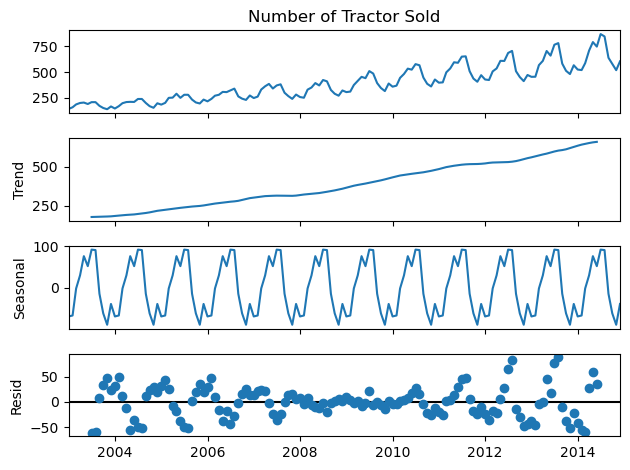

In [83]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Replace 'Column_Name' with your actual sales column (e.g., 'Tractor_Sales')
result = seasonal_decompose(df_ts, model='additive', period=12)

# Plot the decomposition
result.plot()
plt.show()

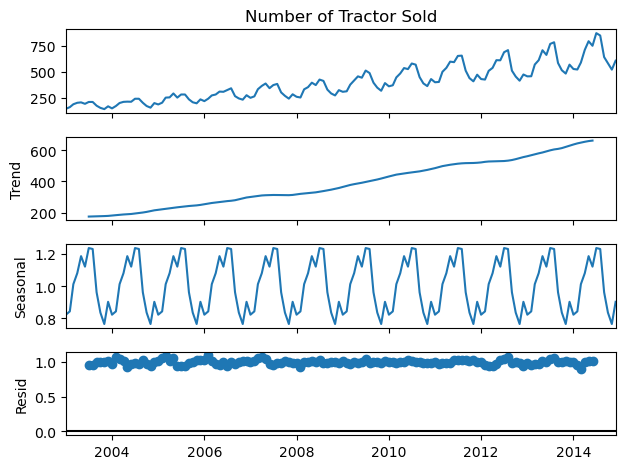

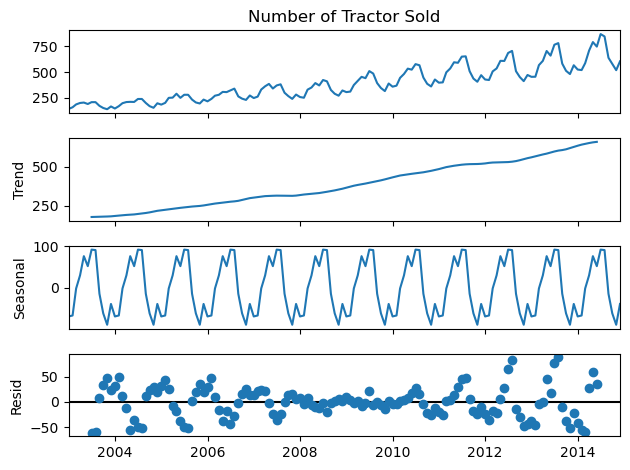

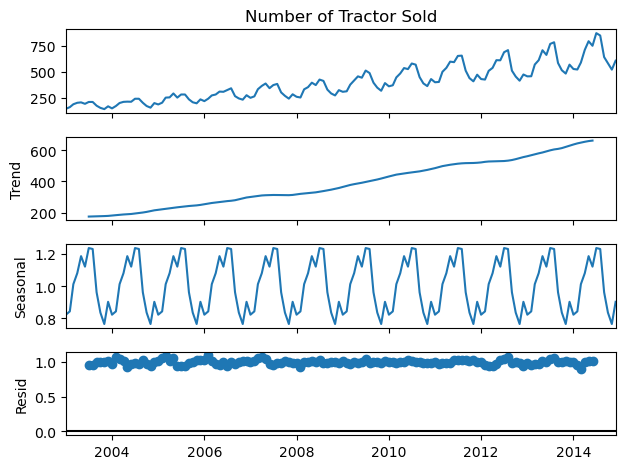

In [92]:
# Additive Decomposition
result_add = seasonal_decompose(df_ts, model='additive', period=12)
result_add.plot()

# Multiplicative Decomposition
result_mul = seasonal_decompose(df_ts, model='multiplicative', period=12)
result_mul.plot()

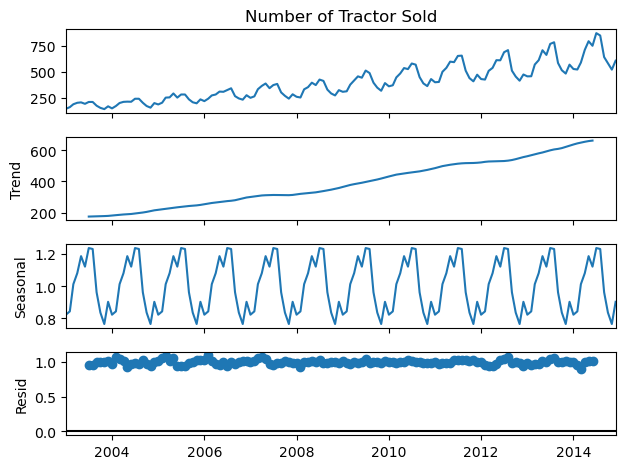

In [90]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Replace 'Column_Name' with your actual sales column (e.g., 'Tractor_Sales')
result = seasonal_decompose(df_ts, model='multiplicative', period=12)

# Plot the decomposition
result.plot()
plt.show()

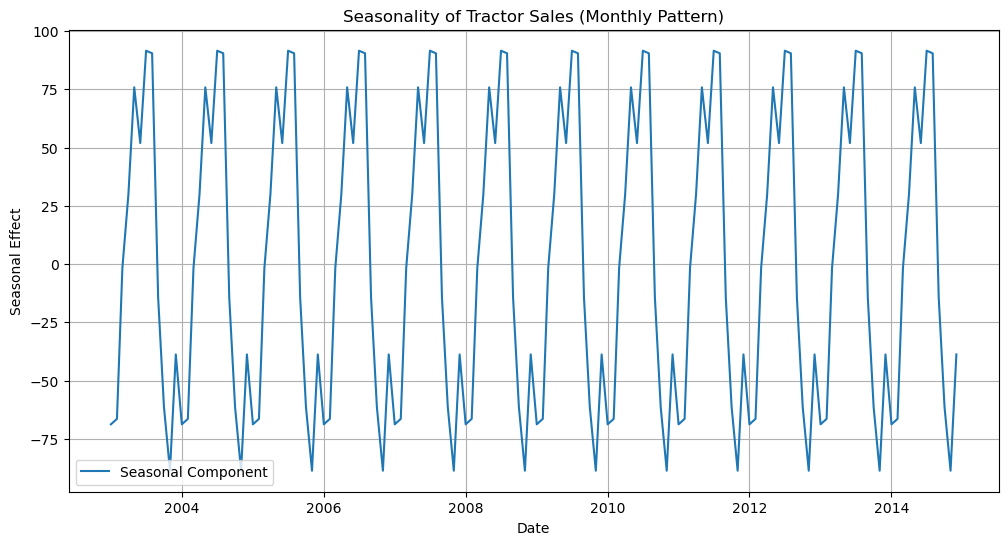

In [84]:
# Extract the seasonal component
seasonal_component = result.seasonal

# Plot seasonality
plt.figure(figsize=(12, 6))
plt.plot(seasonal_component, label='Seasonal Component')
plt.title('Seasonality of Tractor Sales (Monthly Pattern)')
plt.xlabel('Date')
plt.ylabel('Seasonal Effect')
plt.legend()
plt.grid(True)
plt.show()

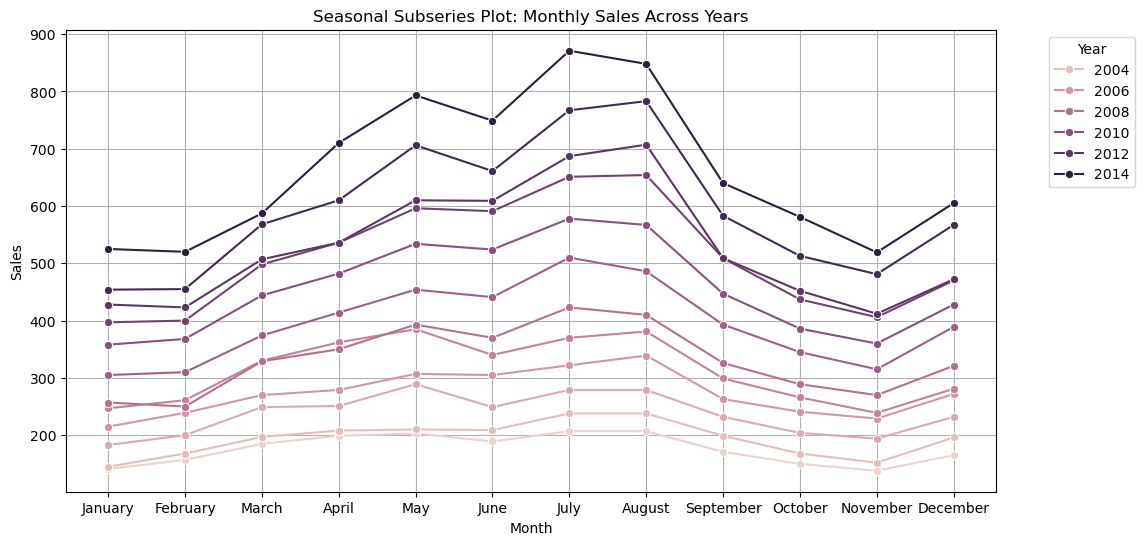

In [87]:
import seaborn as sns

# Extract month and year from the index
df['Month'] = df.index.month_name()
df['Year'] = df.index.year

# Seasonal subseries plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Month', y='Number of Tractor Sold', hue='Year', marker='o')
plt.title('Seasonal Subseries Plot: Monthly Sales Across Years')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [93]:
# Map month names to angles (January=0°, February=30°, ..., December=330°)
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
angles = np.linspace(0, 2 * np.pi, 12, endpoint=False).tolist()  # 0 to 2π radians

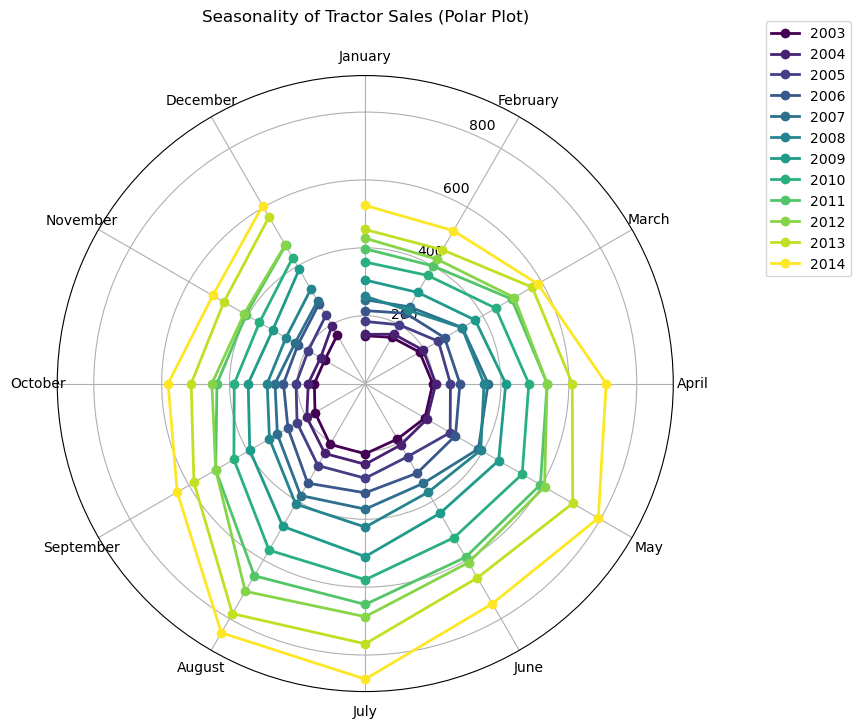

In [97]:
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, polar=True)  # Create polar axis

# Plot each year's sales
years = df['Year'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(years)))  # Color palette

for year, color in zip(years, colors):
    year_data = df[df['Year'] == year]
    year_data = year_data.sort_values(by='Month', key=lambda x: pd.Categorical(x, categories=month_order))
    values = year_data['Number of Tractor Sold'].values
    ax.plot(angles, values, marker='o', color=color, linewidth=2, label=year)

# Customize the plot
ax.set_theta_offset(np.pi/2)  # Start January at the top (0°)
ax.set_theta_direction(-1)    # Plot clockwise
ax.set_xticks(angles)
ax.set_xticklabels(month_order)
ax.set_title('Seasonality of Tractor Sales (Polar Plot)', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()

In [127]:
monthly_sales = pd.pivot_table(df, values= "Number of Tractor Sold",columns="Year",index="Months")
monthly_sales

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Months,,,,,,,,,,,,
Apr,199.0,208.0,251.0,279.0,362.0,350.0,414.0,482.0,536.0,536.0,610.0,710.0
Aug,207.0,238.0,279.0,339.0,381.0,410.0,486.0,567.0,654.0,707.0,783.0,848.0
Dec,165.0,196.0,232.0,272.0,281.0,321.0,389.0,428.0,470.0,472.0,567.0,605.0
Feb,157.0,168.0,200.0,239.0,261.0,250.0,310.0,368.0,400.0,423.0,455.0,520.0
Jan,141.0,145.0,183.0,215.0,247.0,257.0,305.0,358.0,397.0,428.0,454.0,525.0
Jul,207.0,238.0,279.0,322.0,370.0,423.0,510.0,578.0,651.0,687.0,767.0,871.0
Jun,189.0,209.0,249.0,305.0,340.0,370.0,441.0,524.0,591.0,609.0,661.0,749.0
Mar,185.0,197.0,249.0,270.0,330.0,329.0,374.0,444.0,498.0,507.0,568.0,587.0
May,203.0,210.0,289.0,307.0,385.0,393.0,454.0,534.0,596.0,610.0,706.0,793.0


In [129]:
yearly_sales= pd.pivot_table(df, values = "Number of Tractor Sold", columns = "Months", index = "Year")
yearly_sales

Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,
2003,199.0,207.0,165.0,157.0,141.0,207.0,189.0,185.0,203.0,138.0,150.0,171.0
2004,208.0,238.0,196.0,168.0,145.0,238.0,209.0,197.0,210.0,152.0,168.0,199.0
2005,251.0,279.0,232.0,200.0,183.0,279.0,249.0,249.0,289.0,194.0,204.0,232.0
2006,279.0,339.0,272.0,239.0,215.0,322.0,305.0,270.0,307.0,229.0,241.0,263.0
2007,362.0,381.0,281.0,261.0,247.0,370.0,340.0,330.0,385.0,239.0,266.0,299.0
2008,350.0,410.0,321.0,250.0,257.0,423.0,370.0,329.0,393.0,270.0,289.0,326.0
2009,414.0,486.0,389.0,310.0,305.0,510.0,441.0,374.0,454.0,315.0,345.0,393.0
2010,482.0,567.0,428.0,368.0,358.0,578.0,524.0,444.0,534.0,360.0,386.0,447.0
2011,536.0,654.0,470.0,400.0,397.0,651.0,591.0,498.0,596.0,406.0,437.0,509.0


In [130]:
#Re-Index to get it properly COLUMNwise
yearly_sales= yearly_sales.reindex(columns = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
yearly_sales

Months,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2003,141.0,157.0,185.0,199.0,203.0,189.0,207.0,207.0,171.0,150.0,138.0,165.0
2004,145.0,168.0,197.0,208.0,210.0,209.0,238.0,238.0,199.0,168.0,152.0,196.0
2005,183.0,200.0,249.0,251.0,289.0,249.0,279.0,279.0,232.0,204.0,194.0,232.0
2006,215.0,239.0,270.0,279.0,307.0,305.0,322.0,339.0,263.0,241.0,229.0,272.0
2007,247.0,261.0,330.0,362.0,385.0,340.0,370.0,381.0,299.0,266.0,239.0,281.0
2008,257.0,250.0,329.0,350.0,393.0,370.0,423.0,410.0,326.0,289.0,270.0,321.0
2009,305.0,310.0,374.0,414.0,454.0,441.0,510.0,486.0,393.0,345.0,315.0,389.0
2010,358.0,368.0,444.0,482.0,534.0,524.0,578.0,567.0,447.0,386.0,360.0,428.0
2011,397.0,400.0,498.0,536.0,596.0,591.0,651.0,654.0,509.0,437.0,406.0,470.0


<Axes: >

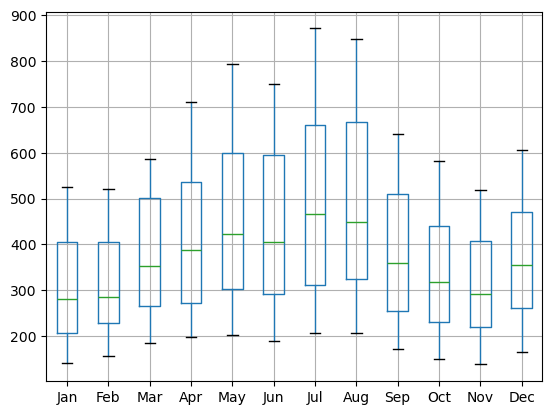

In [131]:
yearly_sales.boxplot()

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Month' is a categorical column with correct order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

# Aggregate sales by month (sum or average)
monthly_sales = df.groupby('Month', observed=True)['Number of Tractor Sold'].sum().reset_index()
# For average instead of total: .mean()

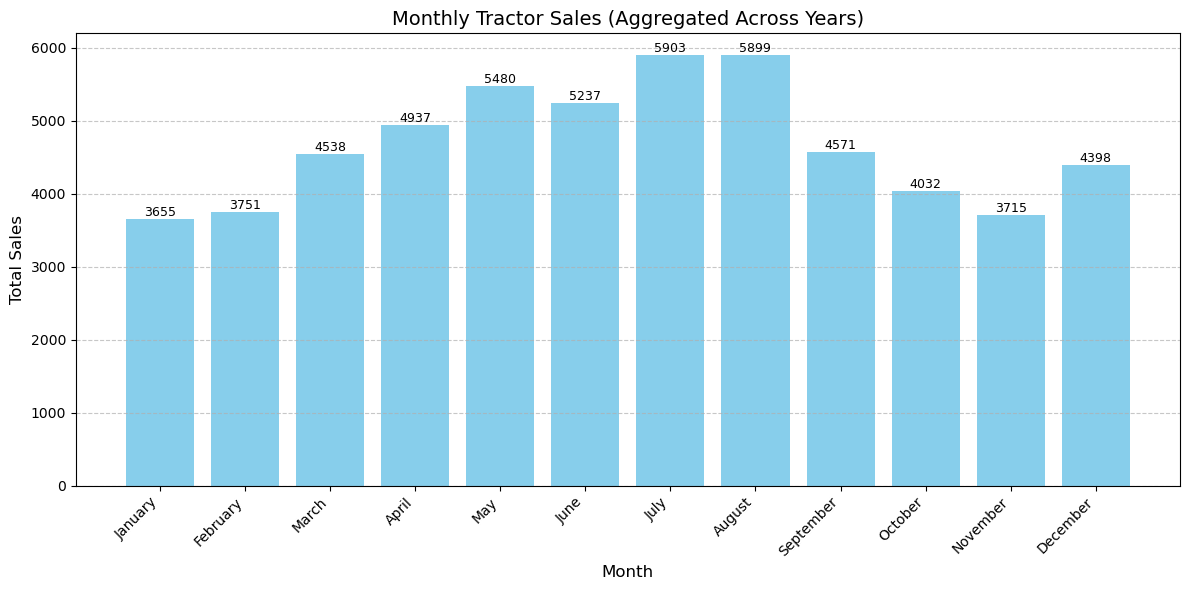

In [99]:
plt.figure(figsize=(12, 6))
bars = plt.bar(monthly_sales['Month'], monthly_sales['Number of Tractor Sold'], color='skyblue')

# Customize the plot
plt.title('Monthly Tractor Sales (Aggregated Across Years)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

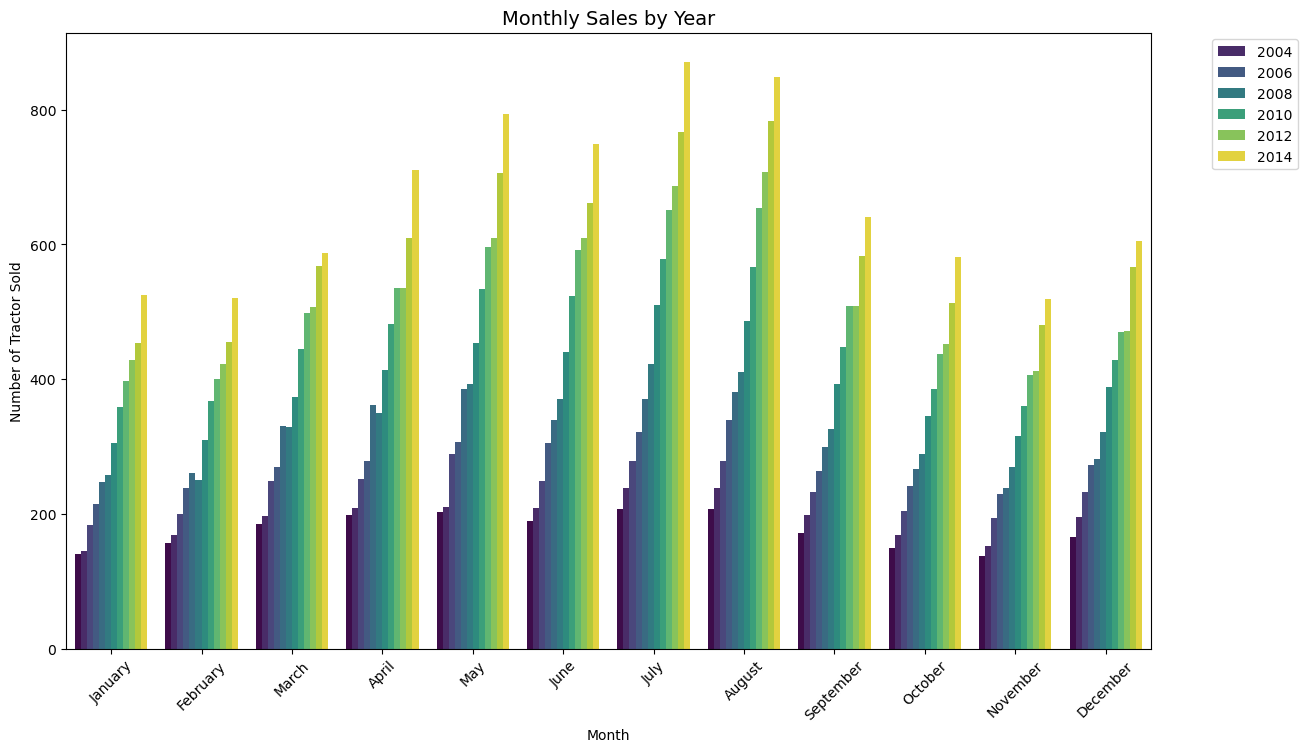

In [101]:
plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='Month', y='Number of Tractor Sold', hue='Year', palette='viridis')
plt.title('Monthly Sales by Year', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

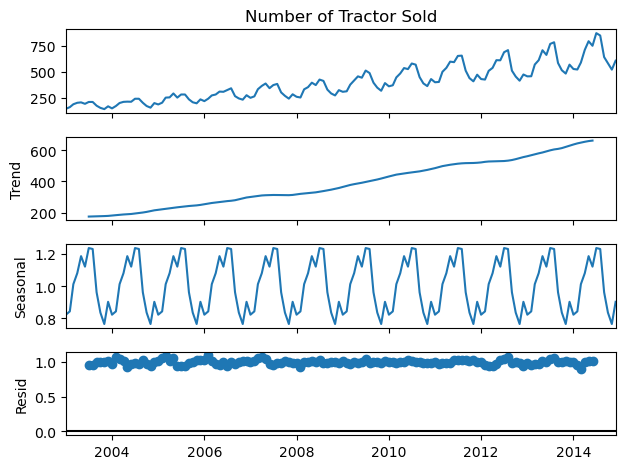

In [118]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Replace 'Column_Name' with your actual sales column (e.g., 'Tractor_Sales')
result = seasonal_decompose(df_ts, model='multiplicative', period=12)

# Plot the decomposition
result.plot()
plt.show()

In [121]:

# Extract decomposition results
df_decomposition = pd.DataFrame({
    "Observed": result.observed,
    "Trend": result.trend,
    "Seasonal": result.seasonal,
    "Residual": result.resid
})
# Display the decomposition results
print(df_decomposition.head())  # Show first few rows

# If using Jupyter Notebook
from IPython.display import display
display(df_decomposition)  # Display DataFrame properly in notebooks


            Observed  Trend  Seasonal  Residual
2003-01-01     141.0    NaN  0.823333       NaN
2003-02-01     157.0    NaN  0.843859       NaN
2003-03-01     185.0    NaN  1.012370       NaN
2003-04-01     199.0    NaN  1.080556       NaN
2003-05-01     203.0    NaN  1.185793       NaN


,Observed,Trend,Seasonal,Residual
2003-01-01,141.0,NaN,0.823333,NaN
2003-02-01,157.0,NaN,0.843859,NaN
2003-03-01,185.0,NaN,1.012370,NaN
2003-04-01,199.0,NaN,1.080556,NaN
2003-05-01,203.0,NaN,1.185793,NaN
...,...,...,...,...
2014-08-01,848.0,NaN,1.230135,NaN
2014-09-01,640.0,NaN,0.961964,NaN
2014-10-01,581.0,NaN,0.836410,NaN
2014-11-01,519.0,NaN,0.765533,NaN


            Log_Observed  Log_Trend  Log_Seasonal  Log_Residual  Trend  \
2003-01-01         141.0        NaN      0.823333           NaN    NaN   
2003-02-01         157.0        NaN      0.843859           NaN    NaN   
2003-03-01         185.0        NaN      1.012370           NaN    NaN   
2003-04-01         199.0        NaN      1.080556           NaN    NaN   
2003-05-01         203.0        NaN      1.185793           NaN    NaN   

            Seasonal  Residual  
2003-01-01  2.278081       NaN  
2003-02-01  2.325324       NaN  
2003-03-01  2.752116       NaN  
2003-04-01  2.946318       NaN  
2003-05-01  3.273282       NaN  
Log-Multiplicative Decomposition saved as 'log_multiplicative_decomposition.csv'


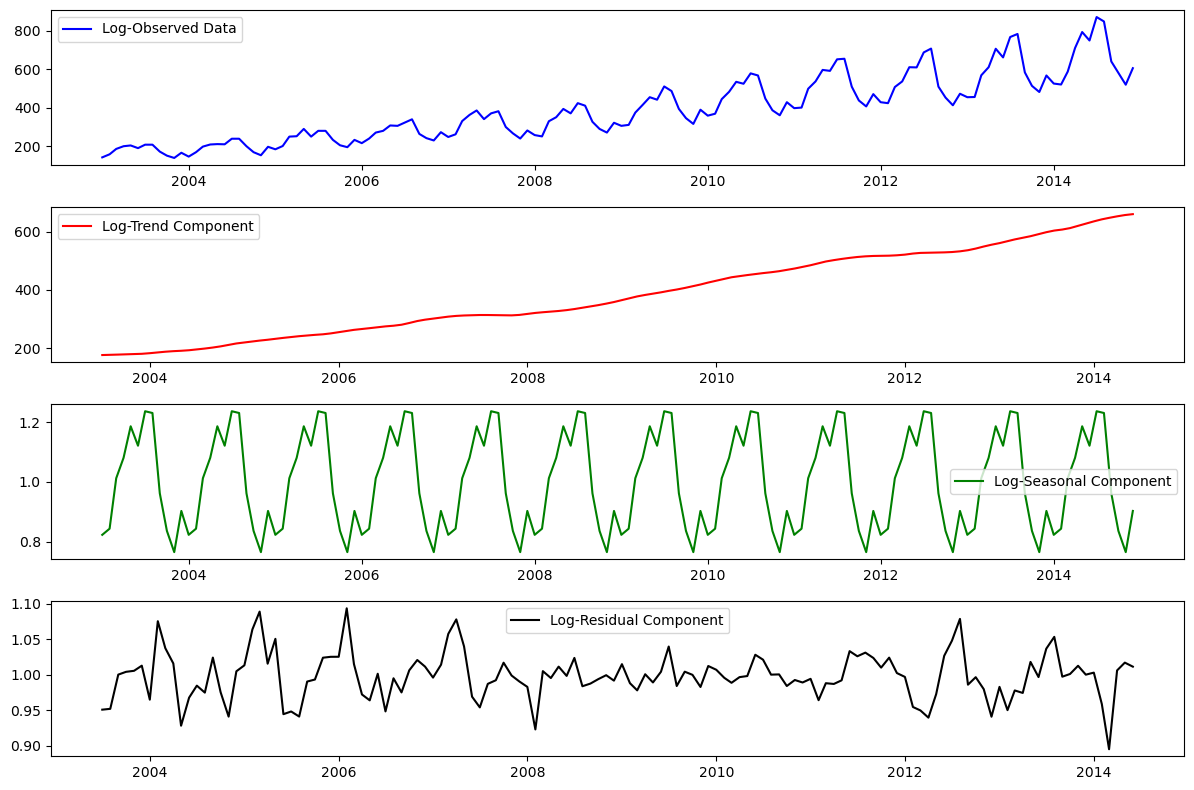

In [125]:
# Extract the decomposed components
df_decomposition_log = pd.DataFrame({
    "Log_Observed": result.observed,
    "Log_Trend": result.trend,
    "Log_Seasonal": result.seasonal,
    "Log_Residual": result.resid
})

# ✅ Apply Exponentiation to Convert Back to Original Scale
df_decomposition_log["Trend"] = np.exp(df_decomposition_log["Log_Trend"])
df_decomposition_log["Seasonal"] = np.exp(df_decomposition_log["Log_Seasonal"])
df_decomposition_log["Residual"] = np.exp(df_decomposition_log["Log_Residual"])

# Display the decomposition results
print(df_decomposition_log.head())  # Show first few rows

# ✅ Save as CSV (Optional)
df_decomposition_log.to_csv("log_multiplicative_decomposition.csv")
print("Log-Multiplicative Decomposition saved as 'log_multiplicative_decomposition.csv'")

# ✅ Plot Log-Transformed Components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df_decomposition_log["Log_Observed"], label='Log-Observed Data', color='blue')
plt.legend()

plt.subplot(412)
plt.plot(df_decomposition_log["Log_Trend"], label='Log-Trend Component', color='red')
plt.legend()

plt.subplot(413)
plt.plot(df_decomposition_log["Log_Seasonal"], label='Log-Seasonal Component', color='green')
plt.legend()

plt.subplot(414)
plt.plot(df_decomposition_log["Log_Residual"], label='Log-Residual Component', color='black')
plt.legend()

plt.tight_layout()
plt.show()